In [4]:
!pip install Pillow

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
from scipy import ndimage

In [29]:
width , height = 800, 800
cx, cy = width // 2, height // 2
max_iter = 256
zoom = 1.0
move_x, move_y = 1.0, 1.0
scale_x, scale_y = 0.25, 0.25

In [30]:
def create_black_hole(width, height, cx, cy, max_iter, zoom, move_x, move_y, scale_x, scale_y):
    img = np.zeros((height, width), dtype = np.uint8)
    for y in range(height):
        for x in range(width):
            zx = (x - cx + move_x) / (width * zoom * scale_x)
            zy = (y - cy + move_y) / (height * zoom * scale_y)
            c = zx + zy * 1j
            z = c
            
            for i in range(max_iter):
                if abs(z) > 4.0:
                    intensity = int((i / max_iter) * 255) 
                    img[y, x] = intensity
                    break
                z = z * z + c
    return img

In [31]:
img = create_black_hole(width, height, cx, cy, max_iter, zoom, move_x, move_y, scale_x, scale_y)
zoomed_img = ndimage.zoom(img, 2, order=3)
image = Image.fromarray(zoomed_img, mode="L")
image.save("black_hole.png")

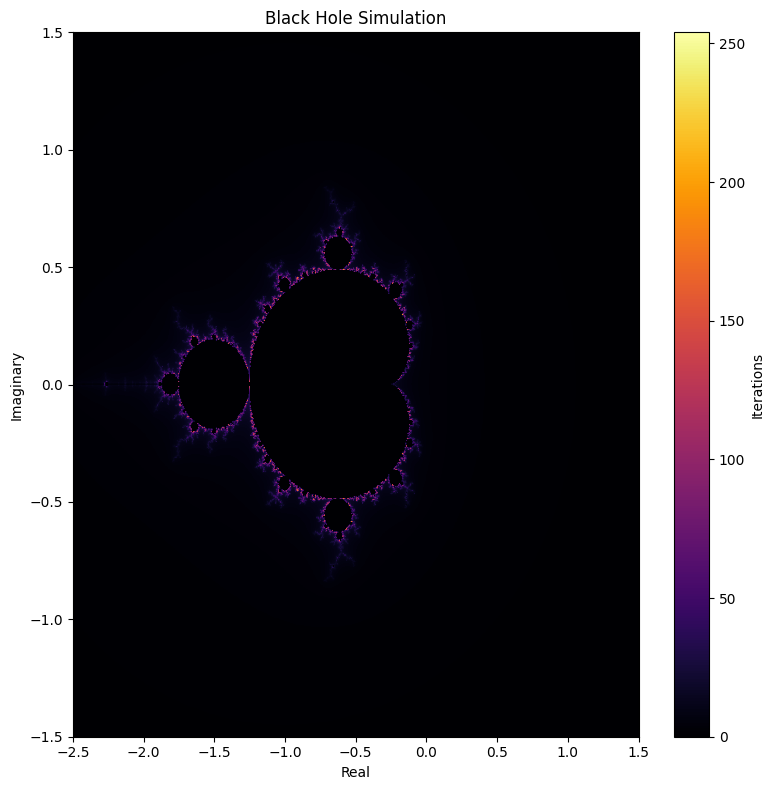

In [32]:
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='inferno', extent=[-2.5, 1.5, -1.5, 1.5], aspect='auto')
plt.colorbar(label='Iterations')
plt.title("Black Hole Simulation")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.tight_layout()
plt.show()